In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", None)
pd.set_option("display.width",500) 
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

In [2]:
train_df=pd.read_csv(r"C:\Users\user\Downloads\train.csv")

In [3]:
test_df=pd.read_csv(r"C:\Users\user\Downloads\test (1).csv")

In [4]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [6]:
train_df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
def check_df(dataframe1,dataframe2,x=5):
    print("INFO")
    print(dataframe1.info(),'\n\n',dataframe2.info())
    print("COLUMNS")
    print(dataframe1.columns,'\n\n',dataframe2.columns)
    print("TYPES")
    print(dataframe1.dtypes,'\n\n',dataframe2.dtypes)
    print("HEAD")
    print(dataframe1.head(x),'\n\n',dataframe2.head(x))
    print("TAIL")
    print(dataframe1.tail(x),'\n\n',dataframe2.tail(x))
    print("NULL VARIABLES")
    print(dataframe1.isnull().sum(),'\n\n',dataframe2.isnull().sum())
    print("QUANTILES")
    print(dataframe1.describe([0,0.05,0.5,0.95,0.99,1]).T,'\n\n',dataframe2.describe([0,0.05,0.5,0.95,0.99,1]).T)

In [9]:
check_df(train_df,test_df)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [10]:
cat_cols=[col for col in train_df.columns if str(train_df[col].dtypes) in ['category','object','bool']]
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
num_but_cat=[col for col in train_df.columns if train_df[col].nunique()<10 and train_df[col].dtypes in ['int64','float64']]
num_but_cat

['Survived', 'Pclass', 'SibSp', 'Parch']

In [12]:
cat_but_car=[col for col in train_df.columns if train_df[col].nunique()>20 and train_df[col].dtypes in ["object",'category']]
cat_but_car

['Name', 'Ticket', 'Cabin']

In [13]:
cat_cols=list(set(cat_cols)-set(cat_but_car))
cat_cols

['Embarked', 'Sex']

In [14]:
cat_cols=cat_cols+num_but_cat
cat_cols

['Embarked', 'Sex', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [15]:
def summary(dataframe,col_name):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),"Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))

In [16]:
for i in cat_cols:
    summary(train_df,i)

   Embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
        Sex      Ratio
male    577  64.758698
female  314  35.241302
   Survived      Ratio
0       549  61.616162
1       342  38.383838
   Pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
   SibSp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
   Parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233


In [17]:
def summary(dataframe,col_name,plot=True):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),"Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)

   Embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975


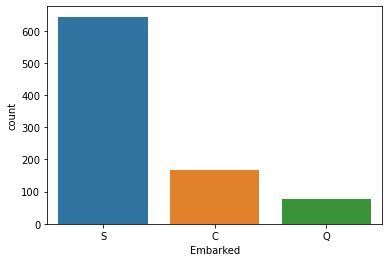

        Sex      Ratio
male    577  64.758698
female  314  35.241302


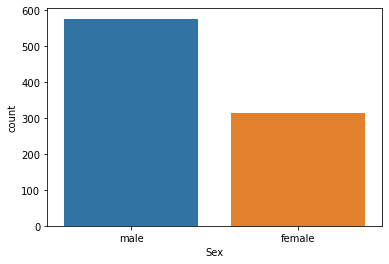

   Survived      Ratio
0       549  61.616162
1       342  38.383838


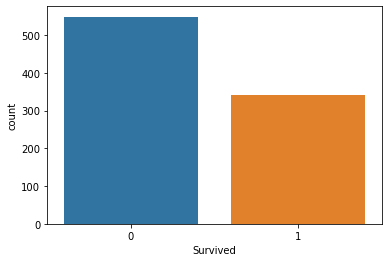

   Pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954


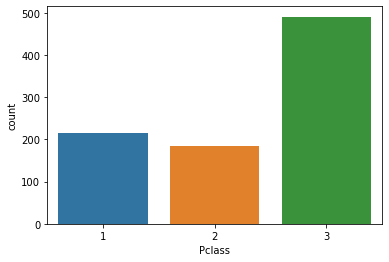

   SibSp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167


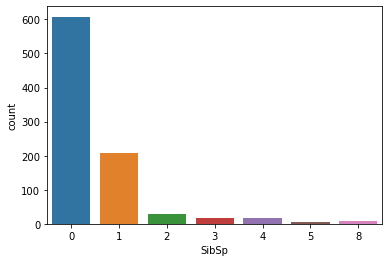

   Parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233


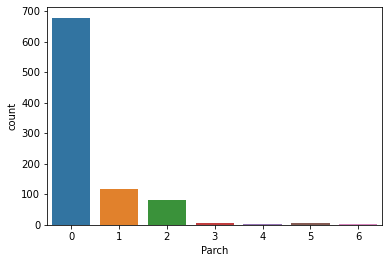

In [18]:
for i in cat_cols:
    if train_df[i].dtypes=='bool':
        print("That isn't categorical varaibles")
    else:
        summary(train_df,i,plot=True)

In [19]:
corr=train_df[cat_cols].corr()
corr

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.035322,0.083081,1.000000,0.414838
Parch,0.081629,0.018443,0.414838,1.000000


<AxesSubplot:>

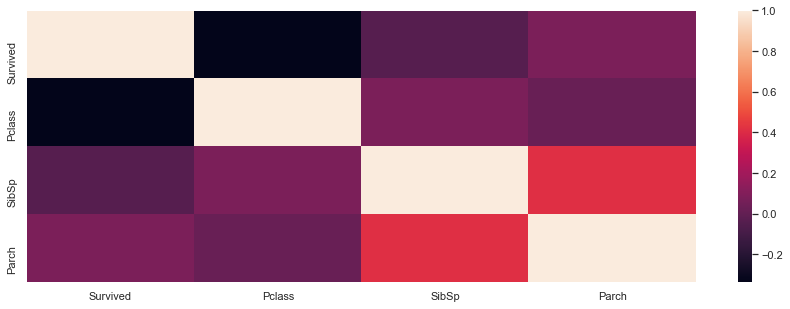

In [20]:
sns.set(rc={"figure.figsize":(15,5)})
sns.heatmap(corr,cmap=None)

In [21]:
pd.pivot_table(train_df,index="Survived",values=["Pclass","SibSp","Parch","Age"])

,Age,Parch,Pclass,SibSp
Survived,,,,
0,30.626179,0.329690,2.531876,0.553734
1,28.343690,0.464912,1.950292,0.473684


In [22]:
train_df=train_df.drop(['PassengerId'], axis=1)

In [23]:
num_cols=[col for col in train_df.columns if train_df[col].dtypes in ['float64','int64']]
num_cols=[col for col in num_cols if col not in cat_cols]

In [24]:
num_cols

['Age', 'Fare']

In [25]:
train_df[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [26]:
def summary(dataframe,col,plot=False):
    quantiles=[0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[col].describe(quantiles).T)
    if plot: 
        dataframe[col].hist()
        plt.xlabel('numerical')
        plt.ylabel('describe')
        plt.title(col)
        plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


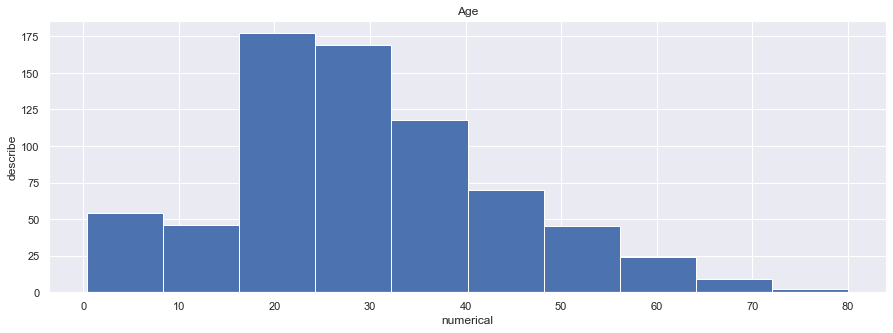

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64


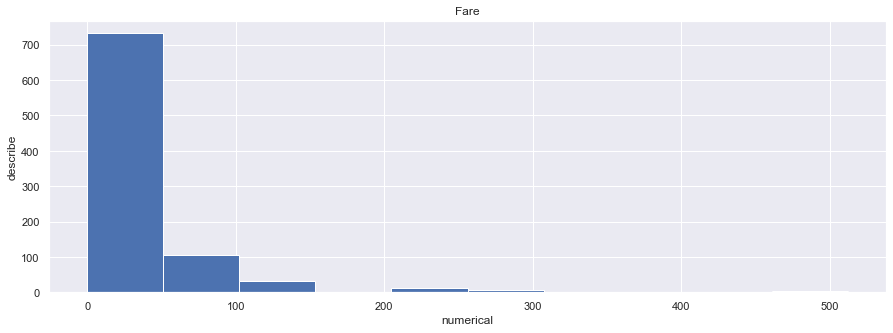

In [27]:
for i in num_cols:
    summary(train_df,i,plot=True)

In [28]:
def target1(dataframe,n,col):
    print(pd.DataFrame({"Target_Mean":dataframe.groupby(col)[n].mean()}))

In [29]:
for i in cat_cols:
    print(target1(train_df,"Survived",i))

          Target_Mean
Embarked             
C            0.553571
Q            0.389610
S            0.336957
None
        Target_Mean
Sex                
female     0.742038
male       0.188908
None
          Target_Mean
Survived             
0                   0
1                   1
None
        Target_Mean
Pclass             
1          0.629630
2          0.472826
3          0.242363
None
       Target_Mean
SibSp             
0         0.345395
1         0.535885
2         0.464286
3         0.250000
4         0.166667
5         0.000000
8         0.000000
None
       Target_Mean
Parch             
0         0.343658
1         0.550847
2         0.500000
3         0.600000
4         0.000000
5         0.200000
6         0.000000
None


In [30]:
def target2(dataframe,n,col):
    print(dataframe.groupby("Survived").agg({col:"mean"}))

In [31]:
for i in num_cols:
    print(target2(train_df,"Survived",i))

                Age
Survived           
0         30.626179
1         28.343690
None
               Fare
Survived           
0         22.117887
1         48.395408
None


In [32]:
survival_rate = sum(train_df["Survived"]) / len(train_df["Survived"])
survival_rate

0.3838383838383838

In [33]:
train_df = train_df.drop(['Ticket', 'Cabin','Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name'], axis=1)


In [34]:
df=[train_df,test_df]

In [35]:
for dataset in df:
    dataset['Sex']=dataset["Sex"].map({"female":1,"male":0})

In [36]:
for i in df:
    age_by_sex = i.groupby('Sex')['Age'].median()
    i['Age'] = i.apply(lambda x:age_by_sex[x['Sex']] if pd.isnull(x['Age']) else x['Age'],axis=1)
    i['Age'] = i['Age'].astype(int)

In [37]:
for dataset in df:    
    dataset.loc[ dataset['Age']<=15,'Age']= 0
    dataset.loc[(dataset['Age']>15)&(dataset['Age']<=30),'Age']= 1
    dataset.loc[(dataset['Age']>30)&(dataset['Age']<=45),'Age']= 2
    dataset.loc[(dataset['Age']>45)&(dataset['Age']<=60),'Age']= 3
    dataset.loc[ dataset['Age']>60,'Age']= 4

In [38]:
for i in df:
    i.dropna(subset=["Embarked"],inplace=True)

In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [40]:
for i in df:
    i['Embarked'] = i['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [41]:
train_df['Fare2'] = pd.qcut(train_df['Fare'], 4)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
0,0,3,0,1,1,0,7.2500,0,"(-0.001, 7.896]"
1,1,1,1,2,1,0,71.2833,1,"(31.0, 512.329]"
2,1,3,1,1,0,0,7.9250,0,"(7.896, 14.454]"
3,1,1,1,2,1,0,53.1000,0,"(31.0, 512.329]"
4,0,3,0,2,0,0,8.0500,0,"(7.896, 14.454]"
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,0,"(7.896, 14.454]"
887,1,1,1,1,0,0,30.0000,0,"(14.454, 31.0]"
888,0,3,1,1,1,2,23.4500,0,"(14.454, 31.0]"
889,1,1,0,1,0,0,30.0000,1,"(14.454, 31.0]"


In [42]:

for i in df:
    i.loc[i['Fare']<=7.91,'Fare']= 0
    i.loc[(i['Fare']>7.91)&(i['Fare']<=14.454),'Fare']= 1
    i.loc[(i['Fare']>14.454)&(i['Fare']<=31),'Fare']= 2
    i.loc[ i['Fare']>31,'Fare']= 3
    i['Fare'] = i['Fare'].astype(int)

train_df = train_df.drop(['Fare2'], axis=1)

In [43]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,0
887,1,1,1,1,0,0,2,0
888,0,3,1,1,1,2,2,0
889,1,1,0,1,0,0,2,1


In [44]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,0,2
1,893,3,1,3,1,0,0,0
2,894,2,0,4,0,0,1,2
3,895,3,0,1,0,0,1,0
4,896,3,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,1,0
414,1306,1,1,2,0,0,3,1
415,1307,3,0,2,0,0,0,0
416,1308,3,0,1,0,0,1,0


In [45]:
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [46]:
y_train=train_df['Survived']
X_train=train_df.drop(['Survived'],axis=1)
X_test=test_df.drop(["PassengerId"],axis=1).copy()

In [47]:
log_model=LogisticRegression()
log = LogisticRegression().fit(X_train,y_train)
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [48]:
y_prob=log.predict_proba(X_test)[:,1]
y_prob

array([0.09404335, 0.26063976, 0.11598586, 0.12473127, 0.51906559,
       0.18560019, 0.68224365, 0.21244185, 0.6288229 , 0.08204572,
       0.09367335, 0.29690107, 0.9285157 , 0.07059991, 0.83549504,
       0.83586591, 0.25124578, 0.11581682, 0.55418544, 0.51441038,
       0.33229808, 0.12549741, 0.95063875, 0.62099612, 0.80816406,
       0.04926425, 0.95493783, 0.11581682, 0.40309498, 0.10174911,
       0.10832192, 0.22415511, 0.4468778 , 0.56370663, 0.56001335,
       0.11581682, 0.64827272, 0.64827272, 0.12473127, 0.21316768,
       0.08929711, 0.51922228, 0.06070526, 0.81206668, 0.89037688,
       0.12473127, 0.46116483, 0.14237252, 0.90515605, 0.54501908,
       0.50107115, 0.36861078, 0.70176081, 0.81664755, 0.36861078,
       0.08313382, 0.06070526, 0.09367335, 0.11701441, 0.93850817,
       0.09367335, 0.1728099 , 0.09367335, 0.68224365, 0.50856819,
       0.85627772, 0.68224365, 0.36798244, 0.46116483, 0.74267067,
       0.68224365, 0.09367335, 0.64827272, 0.57782684, 0.93850

In [49]:
cv_results=cross_validate(log_model,X_train,y_train,cv=5, scoring=["accuracy","f1","roc_auc"])

In [50]:
cv_results["test_accuracy"].mean()

0.7840665270107282

In [51]:
cv_results["test_f1"].mean()

0.7103496761272629

In [52]:
cv_results["test_roc_auc"].mean()

0.8472605848010597

In [53]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
log_params={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga','lbfgs']}

In [55]:
log_gs_best=GridSearchCV(log_model,log_params,cv=5,n_jobs=1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErr

In [56]:
best_model=log_gs_best.best_estimator_

In [57]:
log_gs_best.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [58]:
log_final=log_model.set_params(**log_gs_best.best_params_).fit(X_train,y_train)

In [59]:
cv_results=cross_validate(log_final,X_train,y_train,cv=5,scoring=['accuracy',"f1","roc_auc"])

In [60]:
cv_results["test_accuracy"].mean()

0.7885545610359932

In [61]:
cv_results["test_f1"].mean()

0.7075214404169629

In [62]:
cv_results["test_roc_auc"].mean()

0.8446763234067605

In [63]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.69      0.72       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.78       889
weighted avg       0.80      0.80      0.80       889



In [64]:
print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

0.8550332154719811


In [65]:
tree_model=DecisionTreeClassifier()
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
y_prob=tree.predict_proba(X_test)[:,1]
y_prob

array([0.        , 0.        , 0.        , 0.11864407, 0.        ,
       0.        , 0.7826087 , 0.        , 1.        , 0.        ,
       0.07894737, 0.42857143, 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.17391304, 0.        , 0.        ,
       0.75      , 0.        , 1.        , 0.5       , 1.        ,
       0.        , 1.        , 0.17391304, 0.75      , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.5       ,
       0.17391304, 0.33333333, 0.33333333, 0.11864407, 0.6       ,
       1.        , 0.5       , 0.05263158, 0.9       , 1.        ,
       0.11864407, 0.75      , 0.0952381 , 1.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.05263158, 0.07894737, 0.        , 1.        ,
       0.07894737, 0.21428571, 0.07894737, 0.7826087 , 1.        ,
       1.        , 0.7826087 , 0.        , 0.75      , 1.        ,
       0.7826087 , 0.07894737, 0.33333333, 0.33333333, 1.     

In [67]:
cv_results=cross_validate(tree_model,X_train,y_train,cv=5, scoring=["accuracy","f1","roc_auc"])

In [68]:
cv_results["test_accuracy"].mean()

0.7953215260585285

In [69]:
cv_results["test_f1"].mean()

0.7152362562935173

In [70]:
cv_results["test_roc_auc"].mean()

0.7898967276652111

In [71]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
tree_params={"min_samples_leaf":range(2,50),"min_samples_split":range(1,6),"random_state":[None,10,15,20,25,30,35,40]}

In [73]:
tree_gs_best=GridSearchCV(tree_model,tree_params,cv=5,n_jobs=1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


In [74]:
best_model=tree_gs_best.best_estimator_

In [75]:
tree_gs_best.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 30}

In [76]:
tree_final=tree_model.set_params(**tree_gs_best.best_params_).fit(X_train,y_train)

In [77]:
cv_results=cross_validate(tree_final,X_train,y_train,cv=5,scoring=['accuracy',"f1","roc_auc"])

In [78]:
cv_results["test_accuracy"].mean()

0.8133244461372436

In [79]:
cv_results["test_f1"].mean()

0.7283762802655686

In [80]:
cv_results["test_roc_auc"].mean()

0.8487808467840846

In [81]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.76      0.82       340

    accuracy                           0.87       889
   macro avg       0.87      0.85      0.86       889
weighted avg       0.87      0.87      0.87       889



In [82]:
#print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

In [83]:
knn_model=KNeighborsClassifier()
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [84]:
y_prob=knn.predict_proba(X_test)[:,1]
y_prob

array([0. , 0. , 0. , 0. , 0.6, 0. , 0.8, 0.2, 0.6, 0. , 0.2, 0.4, 1. ,
       0. , 0.8, 0.8, 0.4, 0.2, 0.2, 0.4, 0.6, 0.4, 1. , 0.4, 0.8, 0. ,
       1. , 0.2, 0.6, 0.2, 0. , 0. , 0.6, 0.2, 0.6, 0.2, 0.6, 0.6, 0. ,
       0.6, 0. , 0.4, 0. , 0.8, 1. , 0. , 0.8, 0. , 0.8, 0.6, 0.4, 0.2,
       0.8, 0.8, 0.2, 0. , 0. , 0.2, 0. , 1. , 0.2, 0.2, 0.2, 0.8, 1. ,
       0.8, 0.8, 0. , 0.8, 0.6, 0.8, 0.2, 0.6, 0.2, 1. , 0.4, 0. , 1. ,
       0.2, 0.8, 1. , 0.4, 0.4, 0.2, 0.6, 0. , 0.8, 0.6, 0.8, 1. , 0.2,
       0.2, 0.6, 0. , 0.2, 0.2, 0.8, 0. , 0.4, 0.2, 1. , 0.4, 0. , 0.2,
       0.4, 0. , 0. , 0. , 0. , 0.2, 0.2, 0.8, 1. , 0.8, 0.8, 0. , 0.2,
       1. , 0.4, 0.8, 0.8, 0. , 1. , 0.2, 0. , 0.8, 0.2, 1. , 0.2, 0. ,
       0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.8, 0.2,
       0. , 0.6, 0.2, 0.4, 0. , 0.4, 0.2, 1. , 0.2, 0. , 0.6, 0.4, 0.2,
       1. , 0.4, 0.6, 1. , 0.8, 1. , 0.8, 0.2, 0.2, 0.6, 0.4, 0. , 0.6,
       0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 1. , 0.6, 0.6, 0.8, 0.4, 0.

In [85]:
cv_results=cross_validate(knn_model,X_train,y_train,cv=10, scoring=["accuracy","f1","roc_auc"])

In [86]:
cv_results["test_accuracy"].mean()

0.8031920326864146

In [87]:
cv_results["test_f1"].mean()

0.7290086042282562

In [88]:
cv_results["test_roc_auc"].mean()

0.8418587839176075

In [89]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [90]:
knn_params={"n_neighbors":range(2,50),"p":range(1,6),"leaf_size":[20,25,30,35,40,45],"n_jobs":[None,1,2,3]}

In [91]:
knn_gs_best=GridSearchCV(knn_model,knn_params,cv=5,n_jobs=1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


In [92]:
best_model=knn_gs_best.best_estimator_

In [93]:
knn_gs_best.best_params_

{'leaf_size': 25, 'n_jobs': None, 'n_neighbors': 7, 'p': 2}

In [94]:
knn_final=knn.set_params(**knn_gs_best.best_params_).fit(X_train,y_train)

In [95]:
cv_results=cross_validate(knn_final,X_train,y_train,cv=10,scoring=['accuracy',"f1","roc_auc"])

In [96]:
cv_results['test_accuracy'].mean()

0.8076864147088866

In [97]:
cv_results['test_f1'].mean()

0.7360398471760411

In [98]:
cv_results['test_roc_auc'].mean()

0.846882551000198

In [99]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       549
           1       0.84      0.77      0.80       340

    accuracy                           0.86       889
   macro avg       0.85      0.84      0.85       889
weighted avg       0.86      0.86      0.86       889



In [100]:
 print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]))

0.9047305260902175


In [101]:
# Fit the final model on the full training set and make predictions on the test set
#best_model.fit(X_train, y_train)
#y_pred_final = best_model.predict(X_test)

In [102]:
forest_model=RandomForestClassifier()
forest = RandomForestClassifier().fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
y_prob=forest.predict_proba(X_test)[:,1]
y_prob

array([9.52380952e-04, 2.80666667e-01, 1.26619048e-01, 1.16860482e-01,
       8.00000000e-02, 6.01911674e-01, 7.96328845e-01, 1.75500000e-01,
       9.38372786e-01, 0.00000000e+00, 7.89939662e-02, 4.21012085e-01,
       1.00000000e+00, 1.19166667e-01, 1.00000000e+00, 9.61273810e-01,
       1.20486928e-01, 1.66860672e-01, 1.53846154e-03, 4.22057971e-01,
       7.49428571e-01, 5.29677125e-01, 1.00000000e+00, 4.89035714e-01,
       8.81666667e-01, 2.00000000e-03, 9.90000000e-01, 1.66860672e-01,
       7.72146104e-01, 5.00000000e-02, 3.18015873e-02, 2.20000000e-02,
       4.91666667e-01, 1.92809524e-01, 4.92837302e-01, 1.66860672e-01,
       3.29999042e-01, 3.29999042e-01, 1.16860482e-01, 6.24301587e-01,
       1.70000000e-01, 4.92000957e-01, 4.95770443e-02, 9.02547064e-01,
       1.00000000e+00, 1.16860482e-01, 7.33960317e-01, 9.71406610e-02,
       9.46666667e-01, 2.40000000e-01, 3.68023810e-01, 5.50000000e-02,
       9.15000000e-01, 9.33333333e-01, 5.50000000e-02, 0.00000000e+00,
      

In [104]:
cv_results=cross_validate(forest_model,X_train,y_train,cv=5,scoring=["accuracy","f1","roc_auc"])

In [105]:
cv_results["test_accuracy"].mean()

0.8144353456484478

In [106]:
cv_results["test_f1"].mean()

0.7459791780682417

In [107]:
cv_results["test_roc_auc"].mean()

0.8575343423441103

In [108]:
forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
forest_params={'n_estimators':[100, 200, 300],'max_depth':[5, 10, 20, 30,None],'min_samples_split':[2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [110]:
forest_best_grid=GridSearchCV(forest_model,forest_params,cv=5,n_jobs=1,verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [111]:
forest_final=forest_model.set_params(**forest_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [112]:
cv_results=cross_validate(forest_final,X_train,y_train,cv=5,scoring=["accuracy","f1","roc_auc"])

In [113]:
cv_results["test_accuracy"].mean()

0.8166825366596839

In [114]:
cv_results["test_f1"].mean()

0.7444193331815983

In [115]:
cv_results["test_roc_auc"].mean()

0.8701553991070992

In [116]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       549
           1       0.84      0.77      0.80       340

    accuracy                           0.86       889
   macro avg       0.85      0.84      0.85       889
weighted avg       0.86      0.86      0.86       889



In [117]:
print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

0.9047305260902175


In [118]:
cart_model=DecisionTreeClassifier()
cart=DecisionTreeClassifier().fit(X_train,y_train)

In [119]:
y_pred=cart.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
y_prob=cart.predict_proba(X_test)[:,1]
y_prob

array([0.        , 0.        , 0.        , 0.11864407, 0.        ,
       0.        , 0.7826087 , 0.        , 1.        , 0.        ,
       0.07894737, 0.42857143, 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.17391304, 0.        , 0.        ,
       0.75      , 0.        , 1.        , 0.5       , 1.        ,
       0.        , 1.        , 0.17391304, 0.75      , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.5       ,
       0.17391304, 0.33333333, 0.33333333, 0.11864407, 0.6       ,
       1.        , 0.5       , 0.05263158, 0.9       , 1.        ,
       0.11864407, 0.75      , 0.0952381 , 1.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.05263158, 0.07894737, 0.        , 1.        ,
       0.07894737, 0.21428571, 0.07894737, 0.7826087 , 1.        ,
       1.        , 0.7826087 , 0.        , 0.75      , 1.        ,
       0.7826087 , 0.07894737, 0.33333333, 0.33333333, 1.     

In [121]:
cv_results=cross_validate(cart_model,X_train,y_train,cv=5,scoring=["accuracy","f1","roc_auc"])

In [122]:
cv_results["test_accuracy"].mean()

0.7986859645781756

In [123]:
cv_results["test_f1"].mean()

0.721519772435568

In [124]:
cv_results["test_roc_auc"].mean()

0.7971856449001619

In [125]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [126]:
cart_params={"max_depth":range(1,11),"min_samples_split":range(2,20),"min_samples_leaf":range(1,11)}

In [127]:
cart_best_grid=GridSearchCV(cart_model,cart_params,cv=5,n_jobs=1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


In [128]:
best_model=cart_best_grid.best_estimator_

In [129]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [130]:
cart_final=DecisionTreeClassifier(**cart_best_grid.best_params_).fit(X_train,y_train)

In [131]:
cv_results=cross_validate(cart_model,X_train,y_train,cv=5,scoring=["accuracy","f1","roc_auc"])

In [132]:
cv_results["test_accuracy"].mean()

0.7964324255697328

In [133]:
cv_results["test_f1"].mean()

0.7183259670237578

In [134]:
cv_results["test_roc_auc"].mean()

0.7932713535789628

In [135]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       549
           1       0.90      0.64      0.75       340

    accuracy                           0.83       889
   macro avg       0.85      0.80      0.81       889
weighted avg       0.84      0.83      0.83       889



In [136]:
print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

0.8819672131147541


In [137]:
gbm=GradientBoostingClassifier()
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [138]:
y_pred=gbm_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
y_prob=gbm_model.predict_proba(X_test)[:,1]
y_prob

array([0.04277641, 0.3008293 , 0.064718  , 0.13131619, 0.37810173,
       0.85160358, 0.76131359, 0.09666565, 0.76131359, 0.0847817 ,
       0.08003875, 0.30532494, 0.93485759, 0.28273522, 0.95677305,
       0.92677249, 0.07907659, 0.12885483, 0.37330018, 0.53868651,
       0.53923892, 0.51156763, 0.95166789, 0.42956622, 0.97456337,
       0.05591231, 0.96612414, 0.12885483, 0.55897231, 0.25077936,
       0.08297917, 0.08763637, 0.42109729, 0.33974662, 0.47840116,
       0.12885483, 0.43323191, 0.43323191, 0.13131619, 0.3378067 ,
       0.12942668, 0.43960965, 0.06319553, 0.90275811, 0.96026121,
       0.13131619, 0.46693546, 0.10504795, 0.91699887, 0.47967844,
       0.28290127, 0.1569263 , 0.87034854, 0.88179823, 0.1569263 ,
       0.07069233, 0.06319553, 0.08003875, 0.10614833, 0.97612839,
       0.08003875, 0.15327498, 0.08003875, 0.76131359, 0.94765535,
       0.90381135, 0.76131359, 0.20660712, 0.46693546, 0.88491168,
       0.76131359, 0.08003875, 0.43323191, 0.41271692, 0.97612

In [140]:
cv_results=cross_validate(gbm_model,X_train,y_train, cv=5,scoring=["accuracy","f1","roc_auc"])

In [141]:
cv_results["test_accuracy"].mean()

0.8144543896400686

In [142]:
cv_results["test_f1"].mean()

0.7352108284186393

In [143]:
cv_results["test_roc_auc"].mean()

0.8732479271942305

In [144]:
gbm_params = {'n_estimators': [50, 100, 150],'learning_rate': [0.05, 0.1, 0.15],'max_depth': [2, 3, 4,None],'min_samples_split': [2, 4, 6],'min_samples_leaf': [1, 2, 3]}

In [145]:
gbm_best_grid=GridSearchCV(gbm_model,gbm_params,cv=5,n_jobs=1,verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [146]:
gbm_final=gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [147]:
cv_results=cross_validate(gbm_final,X_train,y_train, cv=5,scoring=["accuracy","f1","roc_auc"])

In [148]:
cv_results["test_accuracy"].mean()

0.8245540531962166

In [149]:
cv_results["test_f1"].mean()

0.7419717184067137

In [150]:
cv_results["test_roc_auc"].mean()

0.872078693028504

In [151]:
best_model=gbm_best_grid.best_estimator_

In [152]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       549
           1       0.87      0.67      0.76       340

    accuracy                           0.84       889
   macro avg       0.85      0.80      0.82       889
weighted avg       0.84      0.84      0.83       889



In [153]:
print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

0.8866977392049717


In [154]:
lgbm=LGBMClassifier().fit(X_train,y_train)

In [155]:
y_pred=lgbm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [156]:
y_prob=lgbm.predict_proba(X_test)[:,1]
y_prob

array([0.02306625, 0.308412  , 0.04164668, 0.12086466, 0.28137407,
       0.90306732, 0.78904069, 0.0306403 , 0.86704999, 0.03280224,
       0.07748894, 0.30150967, 0.98360569, 0.03919768, 0.9880342 ,
       0.81312666, 0.08011627, 0.18020406, 0.25113394, 0.63824225,
       0.67851651, 0.45753088, 0.99289926, 0.42849815, 0.87277854,
       0.04778972, 0.98611147, 0.18020406, 0.73677122, 0.1191472 ,
       0.03593891, 0.0903692 , 0.22162784, 0.11370693, 0.47703906,
       0.18020406, 0.35707408, 0.35707408, 0.12086466, 0.54860973,
       0.14754394, 0.49030309, 0.02918334, 0.91098449, 0.98820282,
       0.12086466, 0.5851998 , 0.06581817, 0.97988096, 0.31264276,
       0.34847716, 0.04010687, 0.92210434, 0.7818893 , 0.04010687,
       0.05149188, 0.02918334, 0.07748894, 0.03557499, 0.99118869,
       0.07748894, 0.21127497, 0.07748894, 0.78904069, 0.8571267 ,
       0.95652375, 0.78904069, 0.07974023, 0.5851998 , 0.88084638,
       0.78904069, 0.07748894, 0.35707408, 0.35860408, 0.99118

In [157]:
cv_results=cross_validate(lgbm,X_train,y_train, cv=5,scoring=["accuracy","f1","roc_auc"])

In [158]:
cv_results["test_accuracy"].mean()

0.8234495016822192

In [159]:
cv_results["test_f1"].mean()

0.7548612022749434

In [160]:
cv_results["test_roc_auc"].mean()

0.8726430113329737

In [161]:
#lgbm_params = {'num_leaves': [15, 31, 63],'max_depth': [3, 5, 7],'learning_rate': [0.05, 0.1, 0.2],'min_child_samples': [10, 20, 30],'subsample': [0.7, 0.8, 0.9],'colsample_bytree': [0.7, 0.8, 0.9],'reg_alpha': [0, 1e-1, 1, 2],'reg_lambda': [0, 1e-1, 1, 5],'n_estimators': [100, 500, 1000],'random_state': [42]}

In [162]:
#lgbm_best_grid=GridSearchCV(lgbm,lgbm_params,cv=5,n_jobs=1,verbose=True).fit(X_train,y_train)

In [163]:
#lgbm_final=gbm_model.set_params(**lgbm_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [164]:
#cv_results=cross_validate(lgbm_final,X_train,y_train, cv=5,scoring=["accuracy","f1","roc_auc"])

In [165]:
#cv_results["test_accuracy"].mean()

In [166]:
#cv_results["test_f1"].mean()

In [167]:
#cv_results["test_roc_auc"].mean()

In [168]:
#best_model=lgbm_best_grid.best_estimator_

In [169]:
#print(classification_report(y_train, best_model.predict(X_train)))

In [170]:
#print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

In [171]:
def plot_importance(model, feature, nun=len(X_train)):
    if hasattr(model, "feature_importances_"):
        feature_imp=pd.DataFrame({"Value":model.feature_importances_,"Feature":feature.columns})
    else:
        feature_imp=pd.DataFrame({"Value":model.coef_[0],"Feature":feature.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False,)[0:nun])
    plt.title("Feature")
    plt.tight_layout()
    plt.show()

In [172]:
models=[log_final,forest_final,tree_final,cart_final,gbm_final,lgbm]

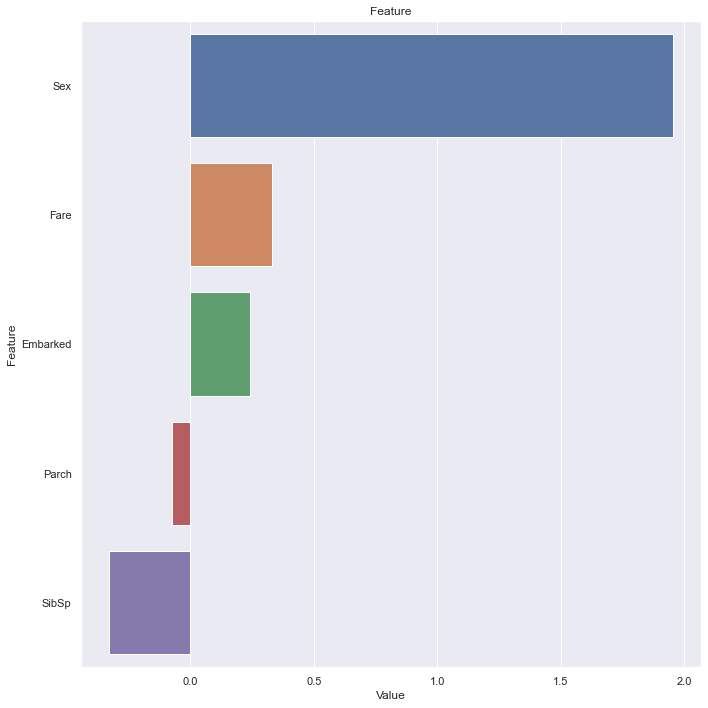

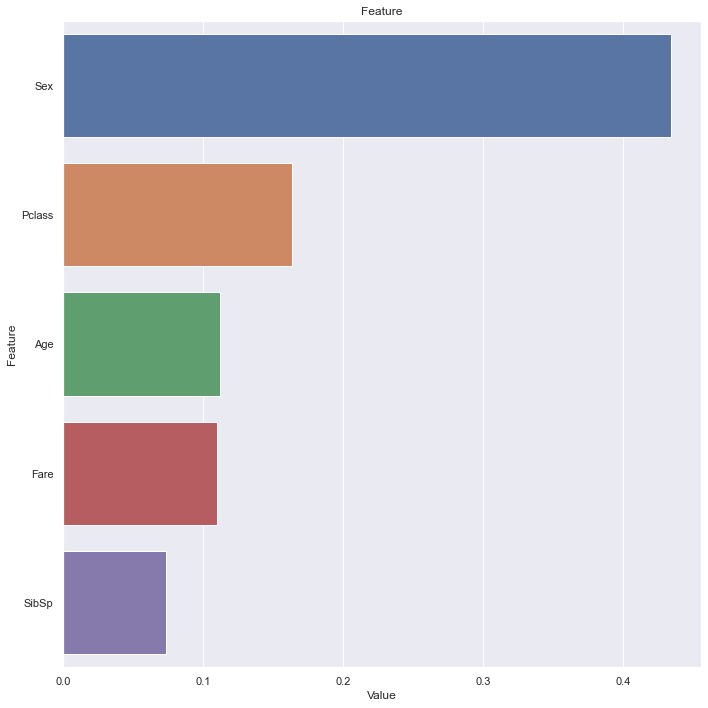

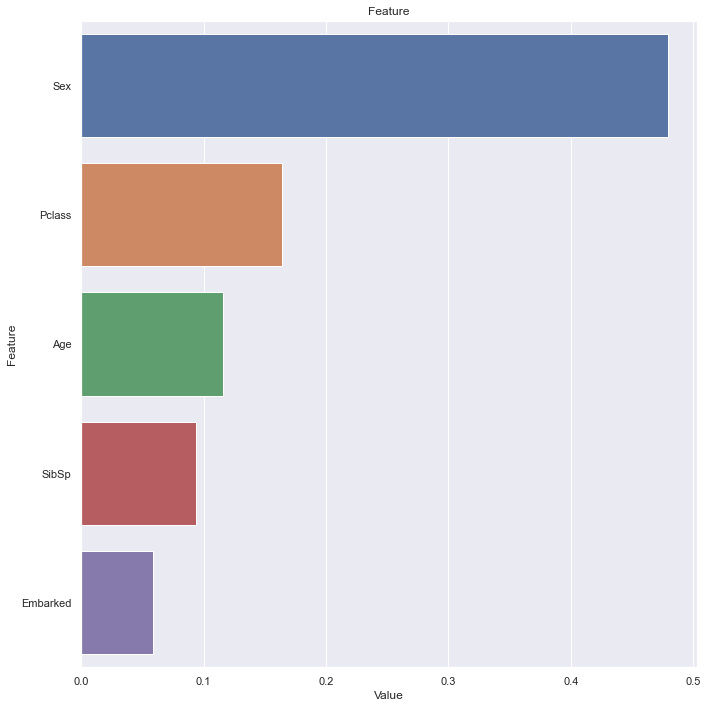

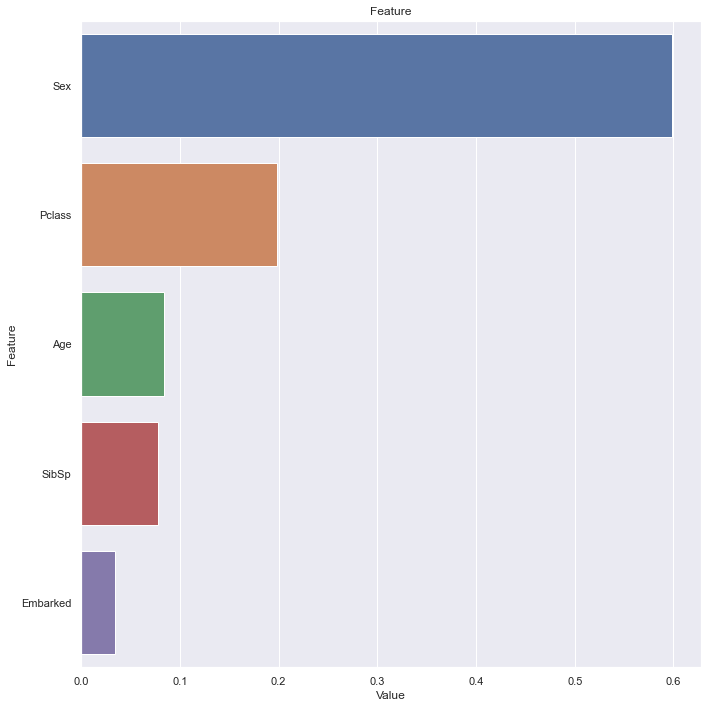

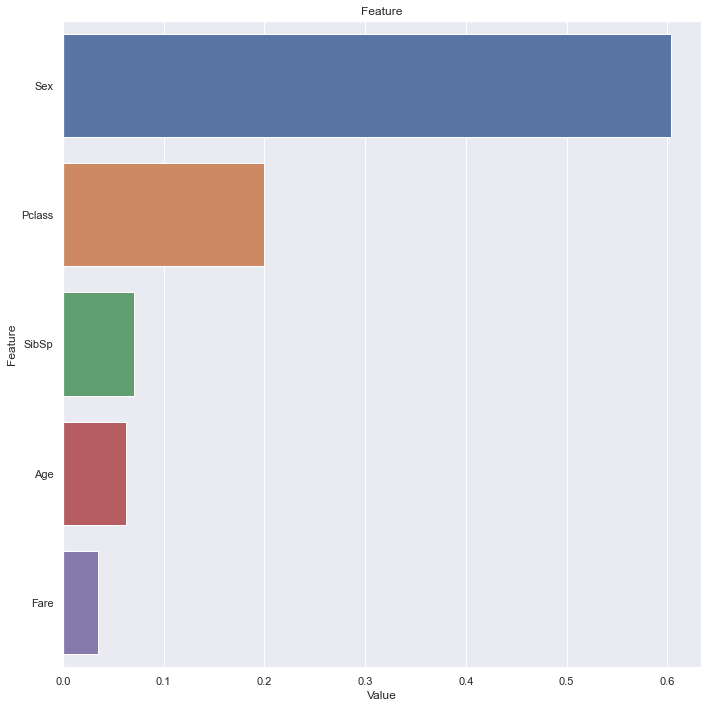

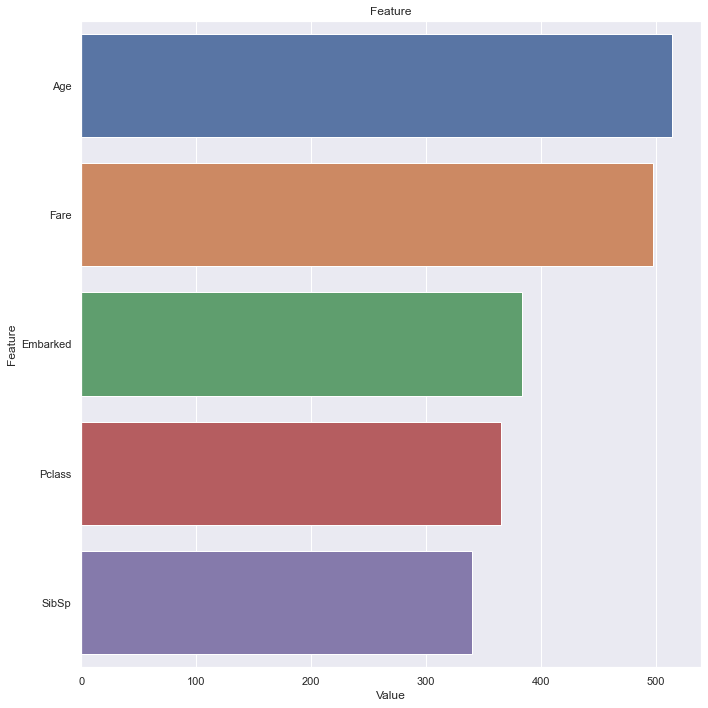

In [173]:
for i in models:
    plot_importance(i,X_train,nun=5)